## icepyx PyPI Statistics
Use PyPIStats library to get data on PyPI downloads of icepyx (or any other package)

See the [pypistats website](https://github.com/hugovk/pypistats) for potential calls, options, and formats (e.g. markdown, rst, html, json, numpy, pandas)

**Note: currently this needs to be run manually (should be able to run all cells) and the changes committed.**

In [15]:
import pypistats
import pandas as pd
# !pip install --upgrade "pypistats[pandas]" # may need this if pypistats wasn't installed with it
# Note: a numpy version is also available

In [16]:
trackpath='doc/source/tracking/pypistats/'
downloadfn = "downloads_data.csv"
sysdownloadfn = "sys_downloads_data.csv"

In [18]:
downloads = pypistats.overall("icepyx", total=True, format="pandas")

try:
    exist_downloads = pd.read_csv(trackpath+downloadfn)
    dl_data = downloads.merge(exist_downloads, how='outer', 
                              on=['category','date','downloads'], ignore_index=True)
except:
    dl_data = downloads
    
dl_data.to_csv(trackpath+downloadfn)

In [20]:
sysdownloads = pypistats.system("icepyx", total=True, format="pandas")

try:
    exist_sysdownloads = pd.read_csv(trackpath+downloadfn)
    dl_data = sysdownloads.merge(exist_sysdownloads, how='outer', 
                              on=['category','date','downloads'], ignore_index=True)
except:
    dl_data = sysdownloads
    
dl_data.to_csv(trackpath+sysdownloadfn)

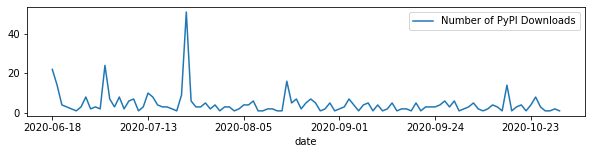

In [24]:
downloads = downloads.groupby("category").get_group("without_mirrors").sort_values("date")

chart = downloads.plot(x="date", y="downloads", figsize=(10, 2),
                       label="Number of PyPI Downloads")
chart.figure.show()
chart.figure.savefig(trackpath+"downloads.png")